# Import de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

# Base de dados

Os dados utilizados serão do conjunto de testes **wine**. 

Disponiel em:
1. [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine)
2. [Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)
3. [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

### Carregando a Base de Dados

In [2]:
wine = datasets.load_wine()

### Criando o Dataframe

In [3]:
df_wine = pd.DataFrame(data= wine.data, columns= wine.feature_names)

In [4]:
df_wine['class'] = wine.target

# Analise Inicial

### Verificando os dados

In [5]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Informações da Base de Dados

In [6]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [7]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
df_wine['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

# Aplicação do KNN na Base de dados

### Separando os dados de treino e teste

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class', axis= 1), df_wine['class'], test_size= 0.3)

### Instanciando o Classificador

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Alguns parametors interessantes do **[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**
1. **n_neighbors**: Número de vizinhos (Deafult= 5).
2. **weights**: Peso de amostras vizinhas (Default= uniform)
3. **metric**: Métrica utilizada para o cálculo de distância (Default= minkowski).
4. **p**: Parametro de potência para a métrica (Default= 2, isso é equivalente Distância Euclidiana)
5. **n_jobs**: Número de jobs paralelos para executar no momento da busca de vizinhos. (Default= 1)

knn = KNeighborsClassifier(n_neighbors= 3)

### Treinando o algoritmo com os dados de treinamento

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Excução do KNN com o conjunto de teste

In [13]:
resultado = knn.predict(X_test)
resultado

array([0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0,
       1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 2, 1])

# Técnicas de Validação

### Matriz de Confusão

In [14]:
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['        Predição'], margins= True))

        Predição   0   1   2  All
Real                             
0                 17   0   2   19
1                  2  12   6   20
2                  2   4   9   15
All               21  16  17   54


### Metricas de classificação

In [15]:
from sklearn import metrics

In [16]:
print(metrics.classification_report(y_test, resultado, target_names= wine.target_names))

              precision    recall  f1-score   support

     class_0       0.81      0.89      0.85        19
     class_1       0.75      0.60      0.67        20
     class_2       0.53      0.60      0.56        15

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.69        54
weighted avg       0.71      0.70      0.70        54



# Otimizando o Parametro K utilizando o GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para os parametros

In [18]:
k_list = list(range(1, 31))
weight_list = ['uniform', 'distance']
p_list = [1, 2, 3]

In [19]:
parametros = dict(n_neighbors= k_list)

In [20]:
parametros

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Instânciado o objeto GridSearch

In [21]:
grid= GridSearchCV(knn, parametros, cv= 5, scoring= 'accuracy')

### Treinando o objeto

In [22]:
grid.fit(df_wine.drop('class', axis= 1), df_wine['class'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Verificando os valores de scores

In [23]:
grid.cv_results_

{'mean_fit_time': array([0.00159974, 0.00099926, 0.00100002, 0.0010006 , 0.0009995 ,
        0.00139942, 0.00140014, 0.00139966, 0.0011982 , 0.00099931,
        0.00099978, 0.00100064, 0.00099978, 0.00100117, 0.0012002 ,
        0.00159917, 0.00159955, 0.00120068, 0.0011992 , 0.0015995 ,
        0.00099955, 0.0009994 , 0.00099931, 0.00099988, 0.00119991,
        0.00120058, 0.00140004, 0.00119939, 0.00140009, 0.00099983]),
 'std_fit_time': array([4.89745942e-04, 9.93378957e-07, 3.23406696e-07, 1.36044909e-06,
        5.09122765e-07, 4.89765515e-04, 4.90446978e-04, 4.89765353e-04,
        3.95705395e-04, 7.62939453e-07, 1.27592928e-06, 1.67233256e-06,
        8.86968386e-07, 1.33514404e-06, 4.00425150e-04, 4.89084846e-04,
        4.89882339e-04, 4.00901901e-04, 4.00448612e-04, 4.89454271e-04,
        1.05120696e-06, 1.08106461e-06, 9.72560790e-07, 1.35206670e-06,
        4.00924768e-04, 3.99995259e-04, 4.89745687e-04, 3.99995060e-04,
        4.90193622e-04, 4.90933902e-07]),
 'mean_scor

In [24]:
scores = grid.cv_results_.get('mean_test_score')

In [25]:
k_rank = grid.cv_results_.get('rank_test_score')

In [26]:
print(f'Melhores parametros {grid.best_params_} com o valor de acurácia {grid.best_score_}')

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7250793650793651


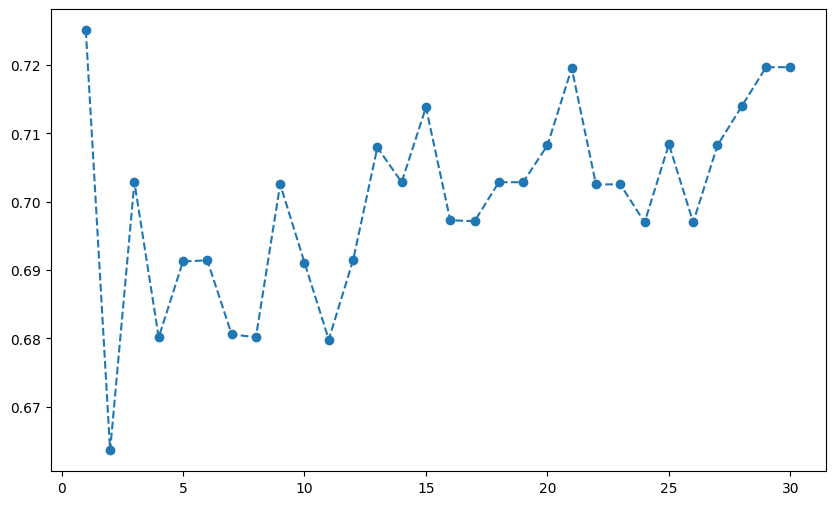

In [27]:
plt.figure(figsize = (10,6))
plt.plot(k_list, scores, linestyle='dashed', marker='o')

# Visualizando as fronteiras de complexidade

### Selecionando os dados

In [28]:
X = wine.data[:,[0,2]]
y = wine.target

### Função para plot de fronteiras de acordo com o número de vizinhos

In [29]:
def plot_fronteiras(n_vizinhos):
    knn = KNeighborsClassifier(n_neighbors= n_vizinhos)
    knn.fit(X, y)
    plt.figure(figsize= (8, 5))
    plot_decision_regions(X, y, clf= knn, legend= 2)
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.title('Fronteiras de Complexidade - KNN')

### Valor de K = 1 

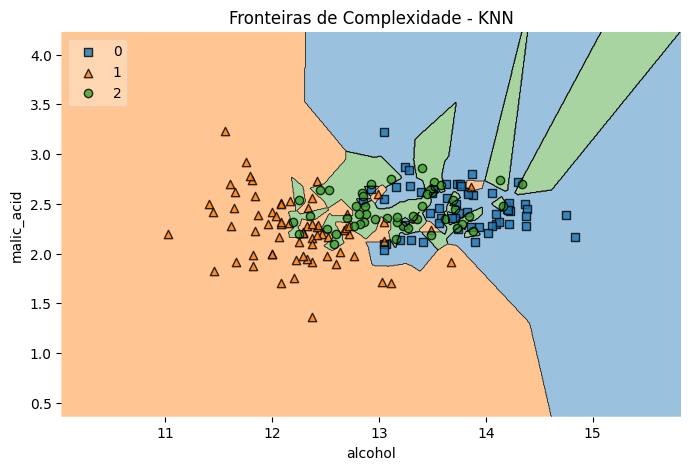

In [30]:
plot_fronteiras(1)

### Valor de k = 5

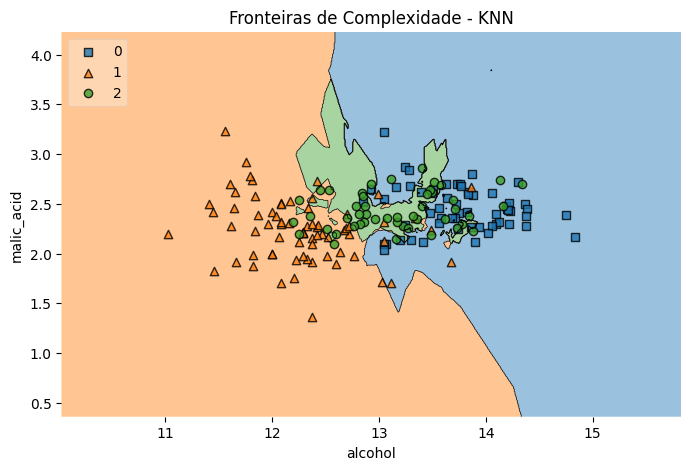

In [31]:
plot_fronteiras(5)

### Valor de k = 15

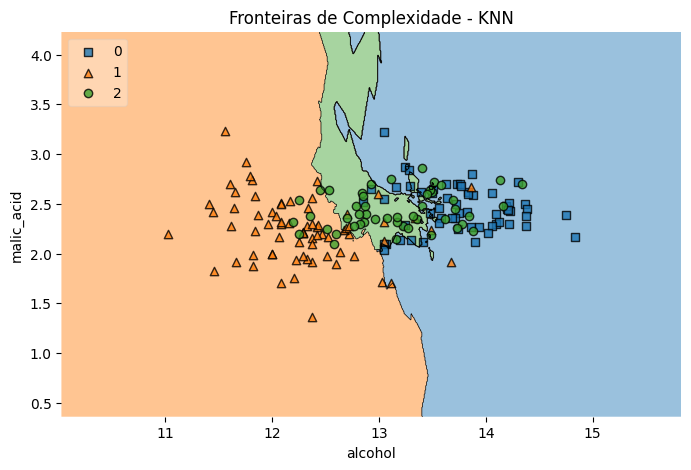

In [32]:
plot_fronteiras(15)

### Valor de K = Número total de amostras

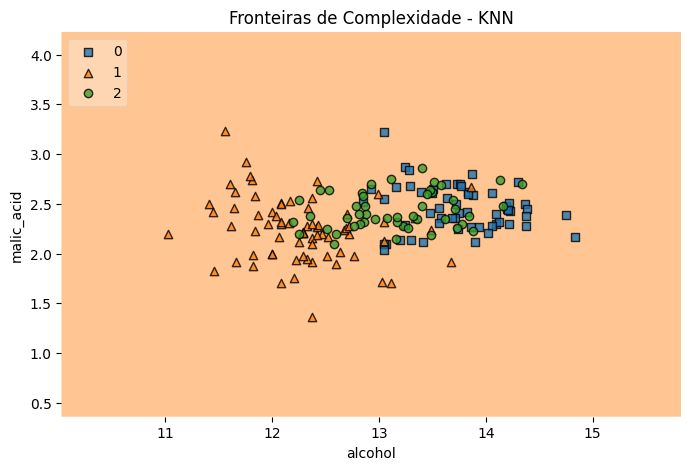

In [33]:
plot_fronteiras(178)